# wave signal as integer or float
Here we investigate the format of wave signal with sound file and pydub
- sound file: only for wav, return wave converted to float32
- pydub: any format, return wave is int16 (depending on encoding)
- see about wave signal encoding [here](https://www.sounddevices.com/32-bit-float-files-explained/)

In [1]:
%matplotlib inline

In [61]:
import numpy as np
import soundfile as sf
import wave
from pydub import AudioSegment
from glob import glob
from matplotlib import pyplot as plt
import os
import numpy as np
import librosa
import IPython.display

In [76]:
audio_file = '../../sample_data/vc_3.wav'
# audio_file = '../test_noise_reduction.wav'

In [77]:
IPython.display.Audio(audio_file)

## Get wave signal from pydub/soundfile

In [78]:
def load_audio_sf(file_path):
    # load wav audio
    signal, frame_rate = sf.read(file_path)
    wave_file = wave.open(file_path, 'r')
    return signal, frame_rate, wave_file.getsampwidth()

def load_audio_pydub(file_path):
    song = AudioSegment.from_wav(file_path)    
    return np.array(song.get_array_of_samples()), song.frame_rate, song.sample_width

def load_audio_librosa(file_path):
    wave_file = wave.open(file_path, 'r')
    signal, sr = librosa.load(sample_file, wave_file.getframerate())
    return signal, sr, wave_file.getsampwidth()

In [79]:
wave_p, frame_rate_p, sample_width_p = load_audio_pydub(audio_file)
wave_s, frame_rate_s, sample_width_s = load_audio_sf(audio_file)
wave_l, frame_rate_l, sample_width_l = load_audio_librosa(audio_file)

### Wave info
- soundfile convert wave signal to float32 as default

In [80]:
print(' - frame rate\n  * (pydub) %s \n  * (sf) %s \n  * (librosa) %s ' % (frame_rate_p, frame_rate_s, frame_rate_l))
print(' - sample width \n  * (pydub) %s \n  * (sf) %s \n  * (librosa) %s' % (sample_width_p, sample_width_s, sample_width_l))
print(' - type \n  * (pydub) %s \n  * (sf) %s \n  * (librosa) %s' % (type(wave_p[0]), type(wave_s[0]), type(wave_l[0])))
print(' - max \n  * (pydub) %s \n  * (sf) %s \n  * (librosa) %s' % (np.max(wave_p), np.max(wave_s), np.max(wave_l)))
print(' - min \n  * (pydub) %s \n  * (sf) %s \n  * (librosa) %s' % (np.min(wave_p), np.min(wave_s), np.min(wave_l)))
print(' - mean \n  * (pydub) %s \n  * (sf) %s \n  * (librosa) %s' % (np.mean(wave_p), np.mean(wave_s), np.mean(wave_l)))

 - frame rate
  * (pydub) 16000 
  * (sf) 16000 
  * (librosa) 16000 
 - sample width 
  * (pydub) 2 
  * (sf) 2 
  * (librosa) 2
 - type 
  * (pydub) <class 'numpy.int16'> 
  * (sf) <class 'numpy.float64'> 
  * (librosa) <class 'numpy.float32'>
 - max 
  * (pydub) 11774 
  * (sf) 0.35931396484375 
  * (librosa) 0.08360619
 - min 
  * (pydub) -10155 
  * (sf) -0.309906005859375 
  * (librosa) -0.06704468
 - mean 
  * (pydub) -1.4139100681361934 
  * (sf) -4.3149110966070354e-05 
  * (librosa) 7.1230517e-07


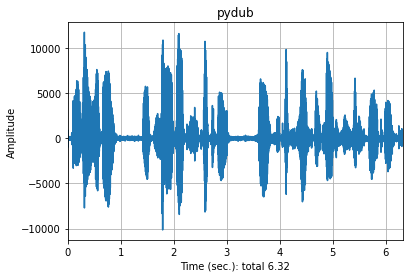

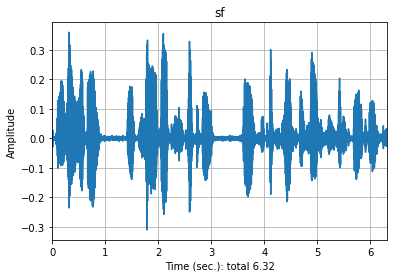

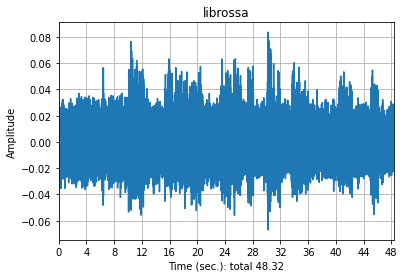

In [81]:
def plot_wav(wav_data, freq, title='wave'):
    assert len(wav_data.shape) == 1
    plt.figure(0, figsize=(6, 4))
    plt.plot(wav_data)
    plt.grid()
    
    interval = 10
    length_sec = int(len(wav_data)/freq) + 1
    interval = min(10, length_sec)
    ind_1 = np.arange(0, length_sec+1, int(length_sec/interval))
    ind_2 = ind_1 * freq
    plt.title(title)
    plt.xticks(ind_2, ind_1)
    plt.xlim([0, len(wav_data)])
    plt.xlabel("Time (sec.): total %0.2f" % (len(wav_data)/freq))
    plt.ylabel("Amplitude")
    plt.show()
    
plot_wav(wave_p, frame_rate_p, title='pydub')
plot_wav(wave_s, frame_rate_s, title='sf')
plot_wav(wave_l, frame_rate_l, title='librossa')

## Convert int to float

In [27]:
wave_p_float = wave_p/pow(2, 15)
all(wave_p_float == wave_s)

True

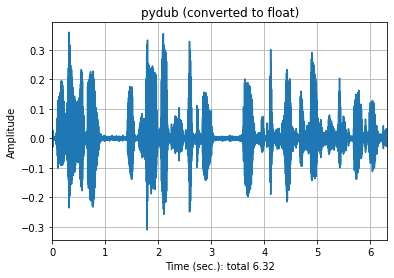

In [28]:
plot_wav(wave_p_float, frame_rate_p, title='pydub (converted to float)')